In [1]:
import csv
import pandas as pd
import emoji
import math
import advertools as adv
import numpy as np
from numpy import array
from numpy.linalg import norm
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

In [2]:
from EmojiCloud.plot import plot_dense_emoji_cloud
from EmojiCloud.emoji import EmojiManager
from EmojiCloud.canvas import EllipseCanvas, RectangleCanvas, MaskedCanvas

In [27]:
import emot 
from emot import emot as emt

In [59]:
emt.emoji

<function emot.core.emot.emoji(self, string)>

In [3]:
country=[]
dataset='England_tweets_of_interest.csv'
with open(dataset,encoding="utf-8") as file:
    for line in file:
        country.append(line.split('|@|||$|')[2])



In [7]:
emo_df=pd.DataFrame(country,columns=['text'])

In [32]:
emo_df.head()

,text
0,Good afternoon! Time for some coffee! ❤ https:...
1,@JewishNewsUK hello respect Board of Deputies ...
2,@JTAnews hello respect Board of Deputies of Br...
3,@hannah_rfh All religions know the meaning of ...
4,@JewishChron @Jewish_Care hello respect Board ...


In [36]:
emo_df=emo_df.dropna()

In [62]:
# # Apply the function to each row of the 'text' column
# emo_df['emoticons'] = emo_df['text'].apply(extract_emoticons)
# # Count the emojis in each list
# emo_df['emoticons'].apply(lambda x: collections.Counter(x))
# # Combine the counts
# combined_counts = sum(emo_df['emoticons'].apply(lambda x: collections.Counter(x)), collections.Counter())
# # Transform it into a dict
# emoji_dict = dict(combined_counts)
# # Sort it in a descending order
# sorted_emoji_dict = dict(sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True))
# # Keep the top 20
# d = {k: v for i, (k, v) in enumerate(sorted_emoji_dict.items()) if i < 20}
# # Convert the dict to a DataFrame for Plotly
# emo_df = pd.DataFrame(list(d.items()), columns=['Emojis', 'Count'])

In [4]:
# getting the tweets with emojis
country_emoji=[]
emoji_count=[]
for i in country:
    if len(emoji.emoji_list(i))!=0:
        country_emoji.append(i)
        emoji_count.append((emoji.emoji_list(i)[0]['emoji']))




In [5]:
pd.Series(emoji_count).value_counts()[1:50].index

Index(['❤️', '😍', '👍', '😭', '🤣', '😊', '😉', '🤔', '🏴󠁧󠁢󠁥󠁮󠁧󠁿', '😁', '🙄', '😘', '😩',
       '😎', '😀', '⚽', '👀', '🔥', '👏', '🇬🇧', '👍🏻', '☀️', '🙈', '💕', '💙', '😳', '😢',
       '👌', '😡', '❤', '😅', '🎉', '☺️', '😱', '😬', '😜', '🙏', '✨', '🙌', '👏🏻', '💖',
       '😆', '🙃', '🤗', '😃', '🙌🏻', '🙂', '💜', '💔'],
      dtype='object')

In [6]:
emo=list(pd.Series(emoji_count).value_counts()[1:50].index)

In [7]:
x=list(pd.Series(emoji_count).value_counts()[1:50].values)
x=list(normalize([x],norm='l1')[0])

In [8]:
emo[:10]

['❤️',
 '😍',
 '👍',
 '😭',
 '🤣',
 '😊',
 '😉',
 '🤔',
 '🏴\U000e0067\U000e0062\U000e0065\U000e006e\U000e0067\U000e007f',
 '😁']

In [9]:
emoji.demojize(emo[9])

':beaming_face_with_smiling_eyes:'

In [10]:
country2=[]
dataset='Japan_tweets_of_interest.csv'
with open(dataset,encoding="utf-8") as file:
    for line in file:
        country2.append(line.split('|@|||$|')[2])



In [11]:
country_emoji1=[]
emoji_count1=[]
for i in country2:
    if len(emoji.emoji_list(i))!=0:
        country_emoji1.append(i)
        emoji_count1.append((emoji.emoji_list(i)[0]['emoji']))



In [12]:
pd.Series(emoji_count1).value_counts()[1:50].index

Index(['‼️', '❗', '✨', '😭', '💦', '😂', '😅', '😃', '😆', '👍', '🎵', '💕', '‼', '❤️',
       '😍', '☺️', '😁', '🤣', '🚺', '🤔', '❤', '❣️', '😱', '😄', '🤗', '🚹', '😢', '🎉',
       '☀️', '☺', '😋', '🙏', '⁉️', '🔥', '☀', '🙄', '⚽', '🎶', '🇯🇵', '😳', '🙇', '😇',
       '😉', '☔', '💓', '💖', '💗', '😌', '😎'],
      dtype='object')

In [13]:
emo1=list(pd.Series(emoji_count1).value_counts()[1:50].index)

In [14]:
x1=list(pd.Series(emoji_count).value_counts()[1:50].values)
x1=list(normalize([x1],norm='l1')[0])

In [15]:
x1

[0.0785707271120293,
 0.05903534264213256,
 0.0518136882267574,
 0.05152998686971925,
 0.051500889294638405,
 0.04482299581358638,
 0.0317127196412269,
 0.031579961954920584,
 0.03037423118750841,
 0.028339219530292396,
 0.027491752656063025,
 0.027198958306812106,
 0.022965261132550367,
 0.022525160309452712,
 0.02215052903028694,
 0.020801128985913138,
 0.020301014414211255,
 0.019617221399811594,
 0.018313286316501597,
 0.017474912434484992,
 0.017058453391140517,
 0.015892731789464494,
 0.015710871945209266,
 0.015336240666043494,
 0.014410574058784376,
 0.013066629809738231,
 0.012319185849849238,
 0.012173697974445055,
 0.011338961289313552,
 0.011300770722019954,
 0.011013432168096691,
 0.0108606698989223,
 0.010760646984581922,
 0.010667898464011755,
 0.010235072034684309,
 0.010167783892309875,
 0.009944096283875943,
 0.009789515416258998,
 0.009769510833390923,
 0.009749506250522847,
 0.009649483336182471,
 0.009607655572003769,
 0.009554916217169751,
 0.009274852057016699,
 

In [16]:
#emoji cloud

In [17]:
adv.emoji_df

,codepoint,status,emoji,name,group,sub_group
0,1F600,fully-qualified,😀,grinning face,Smileys & Emotion,face-smiling
1,1F603,fully-qualified,😃,grinning face with big eyes,Smileys & Emotion,face-smiling
2,1F604,fully-qualified,😄,grinning face with smiling eyes,Smileys & Emotion,face-smiling
3,1F601,fully-qualified,😁,beaming face with smiling eyes,Smileys & Emotion,face-smiling
4,1F606,fully-qualified,😆,grinning squinting face,Smileys & Emotion,face-smiling
...,...,...,...,...,...,...
4576,1F1FF 1F1F2,fully-qualified,🇿🇲,flag: Zambia,Flags,country-flag
4577,1F1FF 1F1FC,fully-qualified,🇿🇼,flag: Zimbabwe,Flags,country-flag
4578,1F3F4 E0067 E0062 E0065 E006E E0067 E007F,fully-qualified,🏴󠁧󠁢󠁥󠁮󠁧󠁿,flag: England,Flags,subdivision-flag
4579,1F3F4 E0067 E0062 E0073 E0063 E0074 E007F,fully-qualified,🏴󠁧󠁢󠁳󠁣󠁴󠁿,flag: Scotland,Flags,subdivision-flag


In [18]:
adv.emoji_df['codepoint'][0]

'1F600'

In [19]:
from EmojiCloud.plot import plot_dense_emoji_cloud
from EmojiCloud.emoji import EmojiManager
from EmojiCloud.canvas import EllipseCanvas, RectangleCanvas, MaskedCanvas
import EmojiCloud
from EmojiCloud import vendors
from EmojiCloud.vendors import TWITTER

In [20]:
l=[]
for i in emo1:
    for j,idx in adv.emoji_df.iterrows():
        if i==idx['emoji']:
            l.append(idx['codepoint'])
            break

In [21]:
l2=[]
for i in emo:
    for j,idx in adv.emoji_df.iterrows():
        if i==idx['emoji']:
            l2.append(idx['codepoint'])
            break

In [22]:
l2

['2764 FE0F',
 '1F60D',
 '1F44D',
 '1F62D',
 '1F923',
 '1F60A',
 '1F609',
 '1F914',
 '1F3F4 E0067 E0062 E0065 E006E E0067 E007F',
 '1F601',
 '1F644',
 '1F618',
 '1F629',
 '1F60E',
 '1F600',
 '26BD',
 '1F440',
 '1F525',
 '1F44F',
 '1F1EC 1F1E7',
 '1F44D 1F3FB',
 '2600 FE0F',
 '1F648',
 '1F495',
 '1F499',
 '1F633',
 '1F622',
 '1F44C',
 '1F621',
 '2764',
 '1F605',
 '1F389',
 '263A FE0F',
 '1F631',
 '1F62C',
 '1F61C',
 '1F64F',
 '2728',
 '1F64C',
 '1F44F 1F3FB',
 '1F496',
 '1F606',
 '1F643',
 '1F917',
 '1F603',
 '1F64C 1F3FB',
 '1F642',
 '1F49C',
 '1F494']

In [23]:
dict_weight={}
for i in range(49):
    dict_weight[l[i]]=x[i]

In [24]:
dict_weight2={}
for i in range(49):
    dict_weight2[l2[i]]=x1[i]

In [25]:
dict_weight2

{'2764 FE0F': 0.0785707271120293,
 '1F60D': 0.05903534264213256,
 '1F44D': 0.0518136882267574,
 '1F62D': 0.05152998686971925,
 '1F923': 0.051500889294638405,
 '1F60A': 0.04482299581358638,
 '1F609': 0.0317127196412269,
 '1F914': 0.031579961954920584,
 '1F3F4 E0067 E0062 E0065 E006E E0067 E007F': 0.03037423118750841,
 '1F601': 0.028339219530292396,
 '1F644': 0.027491752656063025,
 '1F618': 0.027198958306812106,
 '1F629': 0.022965261132550367,
 '1F60E': 0.022525160309452712,
 '1F600': 0.02215052903028694,
 '26BD': 0.020801128985913138,
 '1F440': 0.020301014414211255,
 '1F525': 0.019617221399811594,
 '1F44F': 0.018313286316501597,
 '1F1EC 1F1E7': 0.017474912434484992,
 '1F44D 1F3FB': 0.017058453391140517,
 '2600 FE0F': 0.015892731789464494,
 '1F648': 0.015710871945209266,
 '1F495': 0.015336240666043494,
 '1F499': 0.014410574058784376,
 '1F633': 0.013066629809738231,
 '1F622': 0.012319185849849238,
 '1F44C': 0.012173697974445055,
 '1F621': 0.011338961289313552,
 '2764': 0.01130077072201995

In [26]:
emoji_list = EmojiManager.create_list_from_single_vendor(dict_weight, TWITTER)

In [33]:
print("Plotting rectangle cloud")
canvas_w = 72*10
canvas_h = 72*4
canvas = RectangleCanvas(canvas_w, canvas_h)
saved_emoji_cloud_name = 'england_cloud.png'
im = plot_dense_emoji_cloud(canvas, emoji_list)
im.save(saved_emoji_cloud_name)

Plotting rectangle cloud


[00:46:48] plot_emoji_cloud_given_relax_ratio took 16.9125                                               ]8;id=710697;file://C:\Users\Dheer\AppData\Local\Programs\Python\Python310\lib\site-packages\EmojiCloud\util.py\util.py]8;;\:]8;id=524679;file://C:\Users\Dheer\AppData\Local\Programs\Python\Python310\lib\site-packages\EmojiCloud\util.py#16\16]8;;\

           plot_dense_emoji_cloud took 17.4289                                                           ]8;id=165317;file://C:\Users\Dheer\AppData\Local\Programs\Python\Python310\lib\site-packages\EmojiCloud\util.py\util.py]8;;\:]8;id=134325;file://C:\Users\Dheer\AppData\Local\Programs\Python\Python310\lib\site-packages\EmojiCloud\util.py#16\16]8;;\

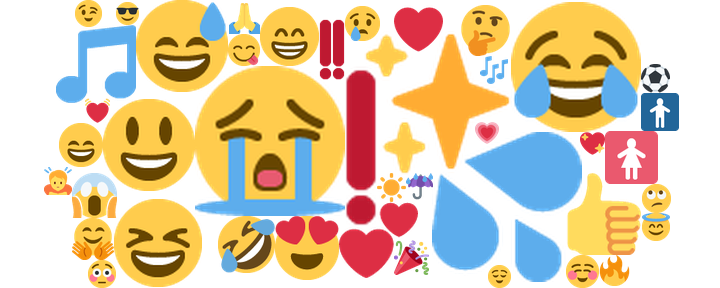

In [28]:
from IPython import display
display.Image('emoji_cloud_rectangle_eng.png')

In [29]:
dict_weight2

{'2764 FE0F': 0.0785707271120293,
 '1F60D': 0.05903534264213256,
 '1F44D': 0.0518136882267574,
 '1F62D': 0.05152998686971925,
 '1F923': 0.051500889294638405,
 '1F60A': 0.04482299581358638,
 '1F609': 0.0317127196412269,
 '1F914': 0.031579961954920584,
 '1F3F4 E0067 E0062 E0065 E006E E0067 E007F': 0.03037423118750841,
 '1F601': 0.028339219530292396,
 '1F644': 0.027491752656063025,
 '1F618': 0.027198958306812106,
 '1F629': 0.022965261132550367,
 '1F60E': 0.022525160309452712,
 '1F600': 0.02215052903028694,
 '26BD': 0.020801128985913138,
 '1F440': 0.020301014414211255,
 '1F525': 0.019617221399811594,
 '1F44F': 0.018313286316501597,
 '1F1EC 1F1E7': 0.017474912434484992,
 '1F44D 1F3FB': 0.017058453391140517,
 '2600 FE0F': 0.015892731789464494,
 '1F648': 0.015710871945209266,
 '1F495': 0.015336240666043494,
 '1F499': 0.014410574058784376,
 '1F633': 0.013066629809738231,
 '1F622': 0.012319185849849238,
 '1F44C': 0.012173697974445055,
 '1F621': 0.011338961289313552,
 '2764': 0.01130077072201995

In [30]:
emoji_list1 = EmojiManager.create_list_from_single_vendor(dict_weight2, TWITTER)

In [34]:
print("Plotting rectangle cloud")
canvas_w = 72*10
canvas_h = 72*4
canvas = RectangleCanvas(canvas_w, canvas_h)
saved_emoji_cloud_name = 'japan_cloud.png'
im = plot_dense_emoji_cloud(canvas, emoji_list1)
im.save(saved_emoji_cloud_name)

Plotting rectangle cloud


[00:47:05] plot_emoji_cloud_given_relax_ratio took 8.5004                                                ]8;id=956802;file://C:\Users\Dheer\AppData\Local\Programs\Python\Python310\lib\site-packages\EmojiCloud\util.py\util.py]8;;\:]8;id=129584;file://C:\Users\Dheer\AppData\Local\Programs\Python\Python310\lib\site-packages\EmojiCloud\util.py#16\16]8;;\

[00:47:17] plot_emoji_cloud_given_relax_ratio took 12.5047                                               ]8;id=830012;file://C:\Users\Dheer\AppData\Local\Programs\Python\Python310\lib\site-packages\EmojiCloud\util.py\util.py]8;;\:]8;id=743849;file://C:\Users\Dheer\AppData\Local\Programs\Python\Python310\lib\site-packages\EmojiCloud\util.py#16\16]8;;\

           plot_dense_emoji_cloud took 21.5170                                                           ]8;id=750770;file://C:\Users\Dheer\AppData\Local\Programs\Python\Python310\lib\site-packages\EmojiCloud\util.py\util.py]8;;\:]8;id=37294;file://C:\Users\Dheer\AppData\Local\Programs\Python\Python310\lib\site-packages\EmojiCloud\util.py#16\16]8;;\

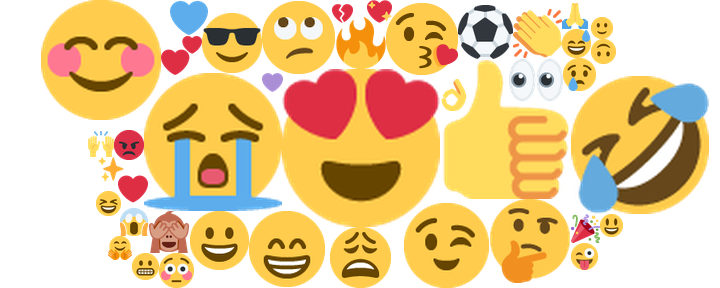

In [32]:
from IPython import display
display.Image('emoji_cloud_rectangle_eng.png')